In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Import Titanic Training data
df = pd.read_csv('train.csv')

In [41]:
# Titanic Training data top 5 values (by default)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# No. of records (rows) and columns
df.shape

(891, 12)

In [43]:
# Data type for columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [44]:
# Columns headings
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df.Survived = df.Survived.astype('category')
df.Pclass = df.Pclass.astype('category')
df.PassengerId = df.PassengerId.astype('category')

In [ ]:
df.pivot_table('Survived', index='Sex', columns='Pclass')

In [47]:
# In order to extract catagories
print(df[['Survived', 'Sex']].groupby(['Survived'])['Sex'].value_counts())
print(df[['Survived', 'Pclass']].groupby(['Survived'])['Pclass'].value_counts())
print(df[['Survived', 'Embarked']].groupby(['Survived'])['Embarked'].value_counts())
print(df[['Survived', 'Parch']].groupby(['Survived'])['Parch'].value_counts())
print(df[['Survived', 'SibSp']].groupby(['Survived'])['SibSp'].value_counts())

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64
Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64
Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64
Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64
Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7

In [59]:
print(df[['Survived', 'SibSp']].groupby(['Survived']).count())

          SibSp
Survived       
0           549
1           342


<AxesSubplot:xlabel='Survived', ylabel='count'>

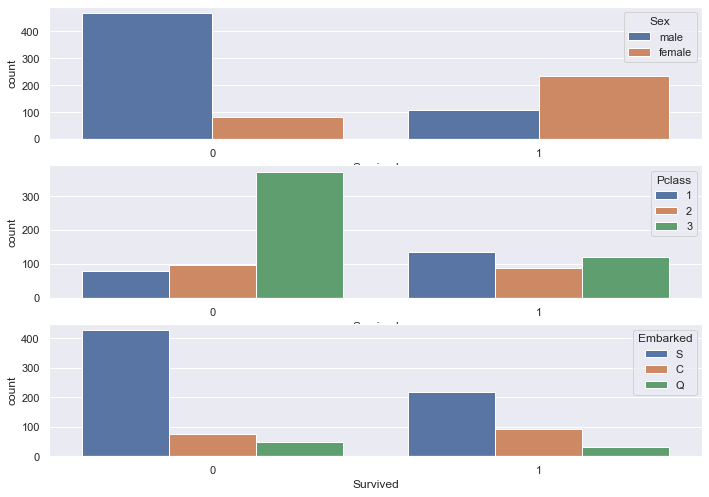

In [48]:
# Count plot for survivales based on Sex, Pessenger class 'Pclass' and Port of Embarkation 'Embarked'

#plt.figure(figsize=(30,30))
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(3,1)
sns.countplot(x='Survived', data=df, hue='Sex', dodge=True, ax=ax[0])
sns.countplot(x='Survived', data=df, hue='Pclass', dodge=True, ax=ax[1])
sns.countplot(x='Survived', data=df, hue='Embarked', dodge=True, ax=ax[2])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

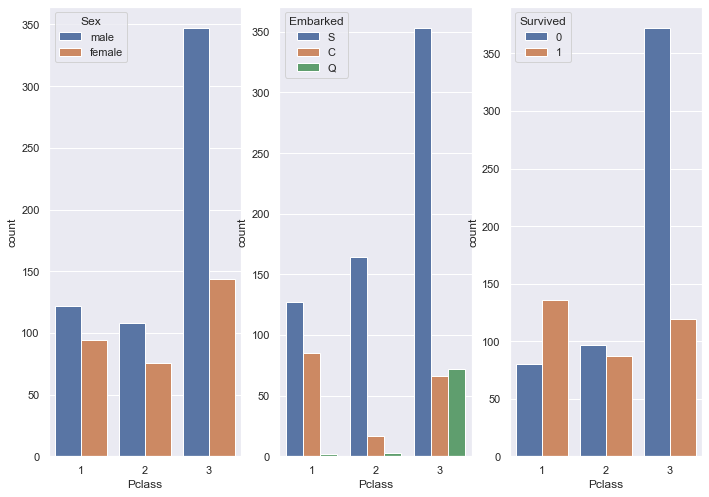

In [49]:
# Count plot for Pessenger class 'Pclass' based on Sex, Embarked and survival
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots(1,3)
sns.countplot(x=df['Pclass'], hue=df['Sex'], dodge=True, ax=ax[0])
sns.countplot(x=df['Pclass'], hue=df['Embarked'], dodge=True, ax=ax[1])
sns.countplot(x=df['Pclass'], hue=df['Survived'], dodge=True, ax=ax[2])

<AxesSubplot:xlabel='Survived', ylabel='count'>

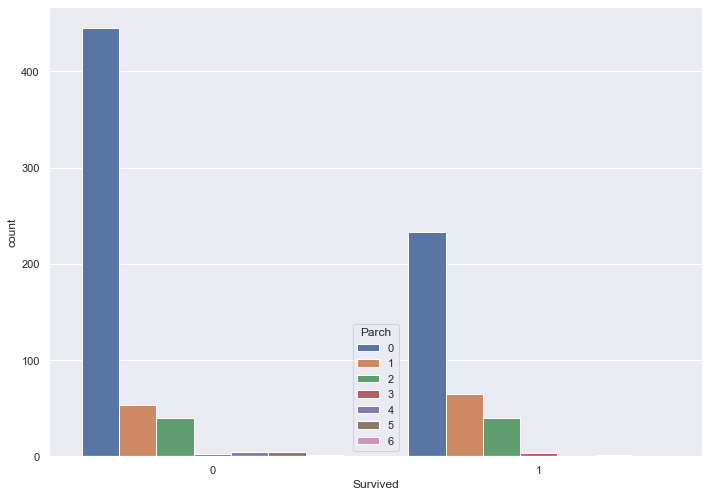

In [50]:
# Trying to see the Dataframe distribution based on Parent child 'Parch' column
sns.countplot(x='Survived', data=df, hue='Parch', dodge=True)

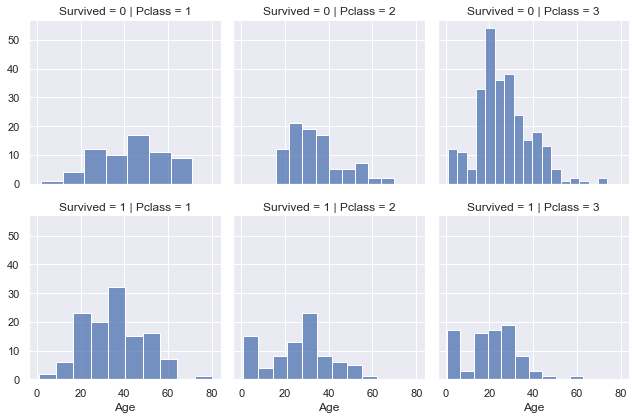

In [51]:
# Plotting Pessenger class 'Pclass' count w.r.t Age distribution
g = sns.FacetGrid(df, row='Survived', col='Pclass')
g.map(sns.histplot, 'Age')
plt.show()

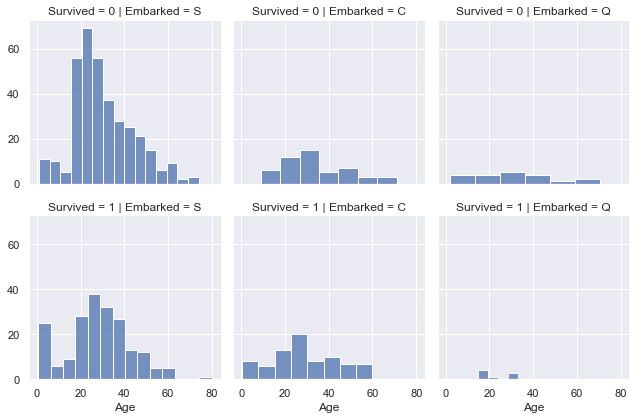

In [52]:
# Plotting Port of Embarkation 'Embarked' count w.r.t Age distribution (S=Southampton, C=Cherbourg, Q=Queenstown)
g = sns.FacetGrid(df, row='Survived', col='Embarked')
g.map(sns.histplot, 'Age')
plt.show()

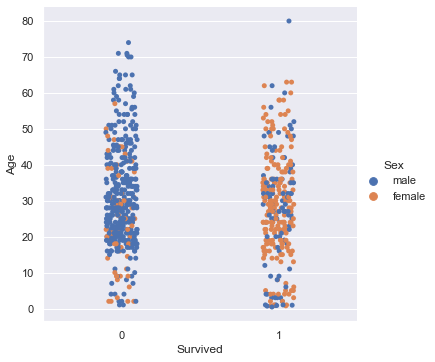

In [53]:
sns.catplot(x="Survived", y="Age", hue="Sex", data=df)

In [54]:
first_class = (df['Pclass'] == 1).sum()
second_class = (df['Pclass'] == 2).sum()
third_class = (df['Pclass'] == 3).sum()
print(first_class)
print(second_class)
print(third_class)

216
184
491


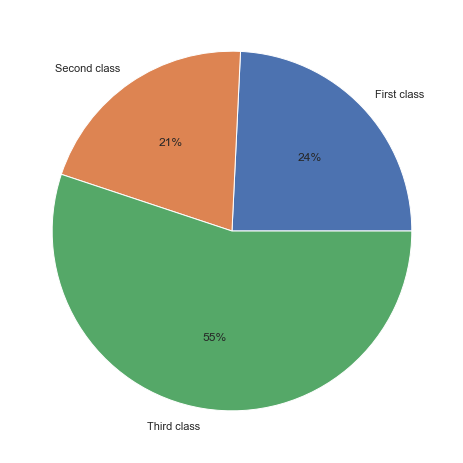

In [55]:
labels = ['First class', 'Second class', 'Third class']

sizes = [first_class, second_class, third_class]
plt.pie(x=sizes, labels=labels, autopct='%2.0f%%');

<AxesSubplot:xlabel='Age', ylabel='Survived'>

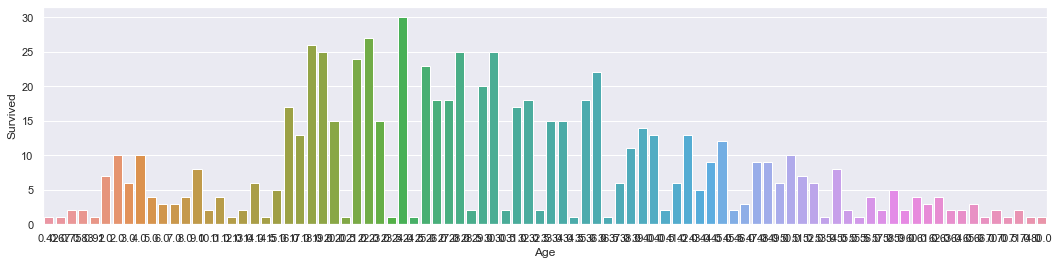

In [56]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df[["Age", "Survived"]].groupby(['Age'],as_index=False)['Survived'].count()
sns.barplot(x='Age', y='Survived', data=average_age)